# Time Series Forecast - CO2 Data

In [3]:
#Install the packages
#install.packages("nlme")

#load the library
library(nlme)

also installing the dependency ‘lattice’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "ts"

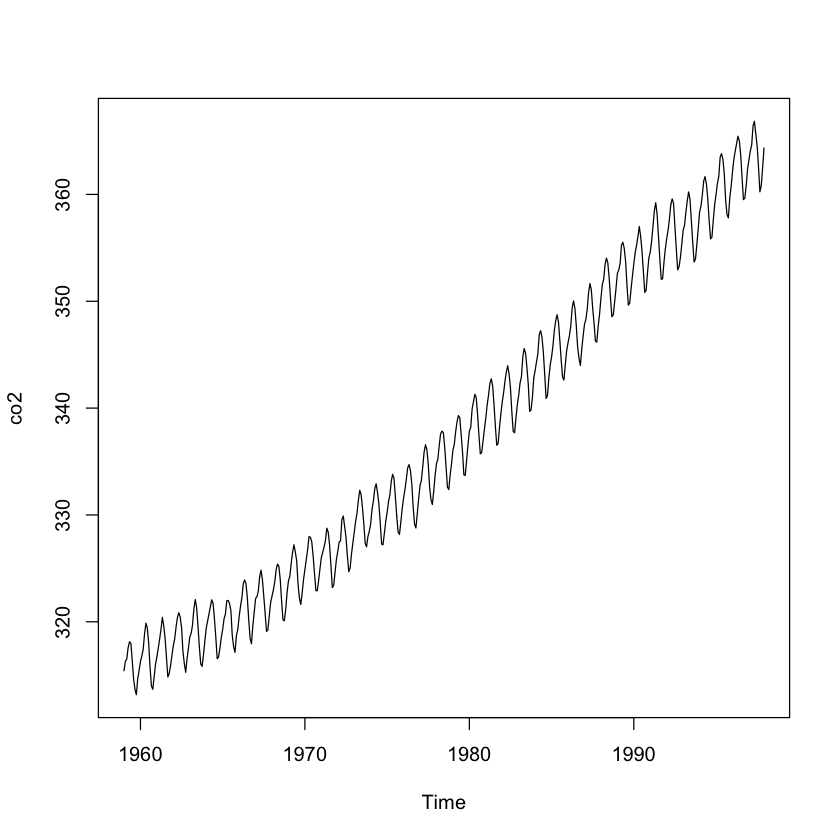

In [5]:
#data preprocessing
class(co2)  #ts object
plot(co2)

In [6]:
#Extract training and test set
co2_train=window(co2,start=c(1959,1),end=c(1989,12))
co2_test=window(co2,start=c(1990,1),end=c(1997,12))

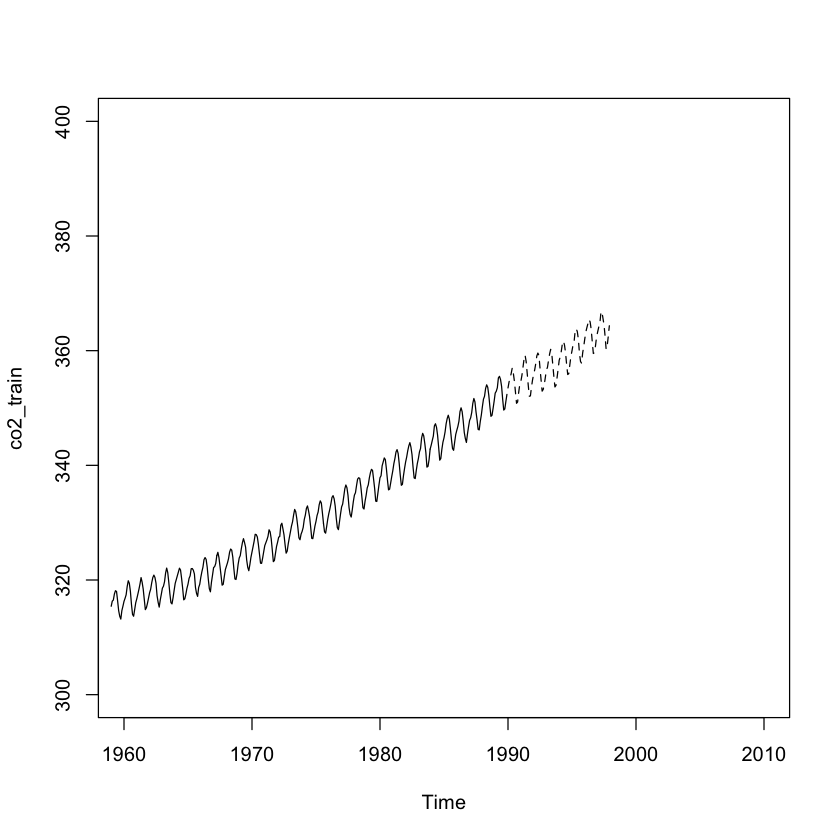

In [7]:
#plotting traing and testing sets
plot(co2_train,xlim=c(1960,2010),ylim=c(300,400))
lines(co2_test,lty=2)

In [10]:
#install.packages("forecast")
library(forecast)

[1] 1.316165


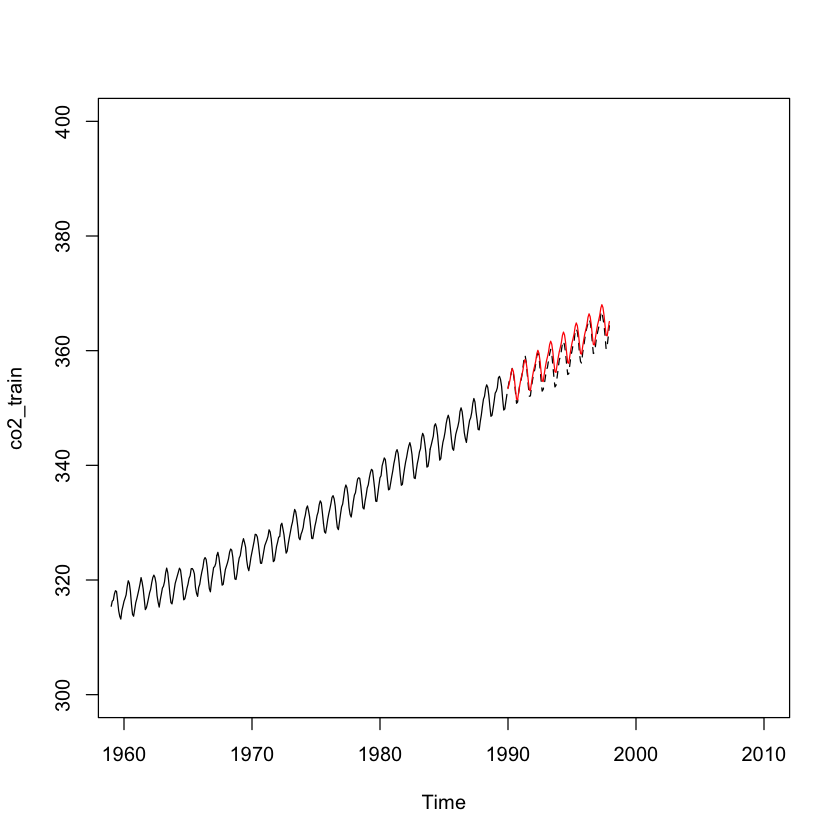

In [11]:
#We see a trend and a seasonal pattern, probably additive.
h=hw(co2_train,seasonal='additive',damped=FALSE,h=96)
plot(co2_train,xlim=c(1960,2010),ylim=c(300,400))
lines(co2_test,lty=2)
lines(h$mean,col=2)

#error
print(sqrt(mean((h$mean-co2_test)^2)))

[1] 3.686467


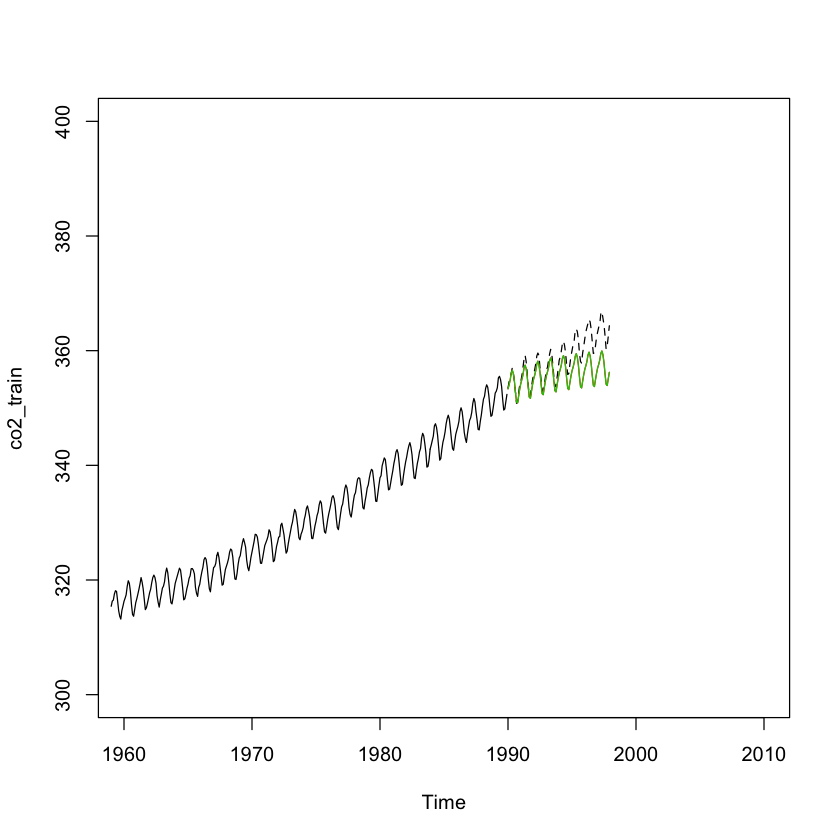

In [12]:
# Compare the results with a damped version
h=hw(co2_train,seasonal='additive',damped=TRUE,h=96)
plot(co2_train,xlim=c(1960,2010),ylim=c(300,400))
lines(co2_test,lty=2)
lines(h$mean,col=2)
lines(h$mean,col=3)

#error
print(sqrt(mean((h$mean-co2_test)^2)))

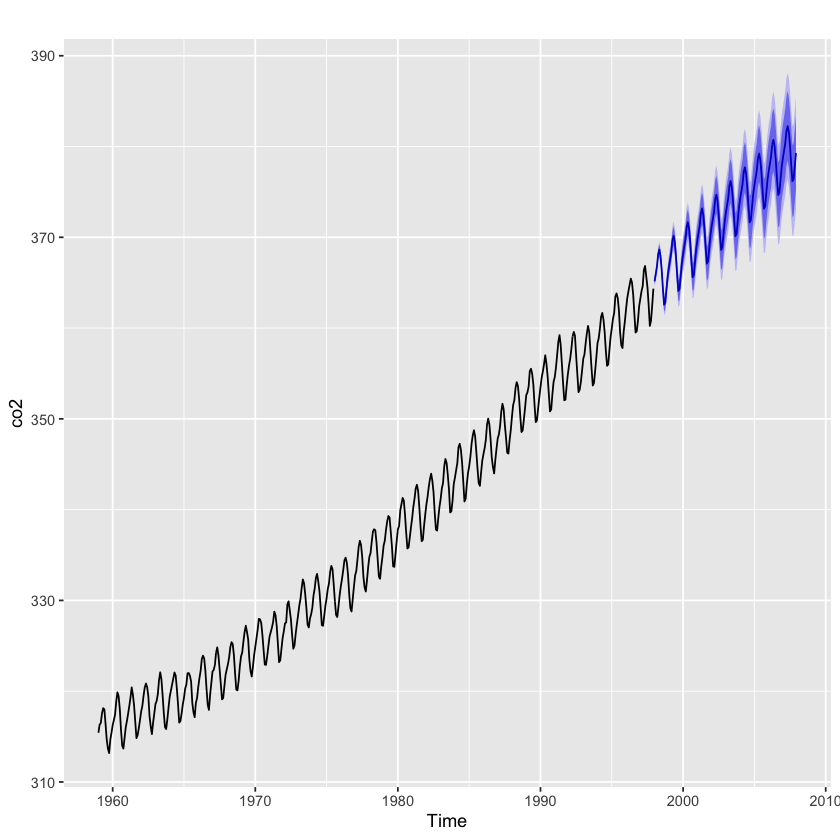

In [13]:
#predicting for next 10 years
h=hw(co2,seasonal='additive',damped=FALSE,h=120)
autoplot(co2)+autolayer(h)